Exercise 1. Change shots, say 10, 100, 1000, 10000 and plot histograms with different shots.

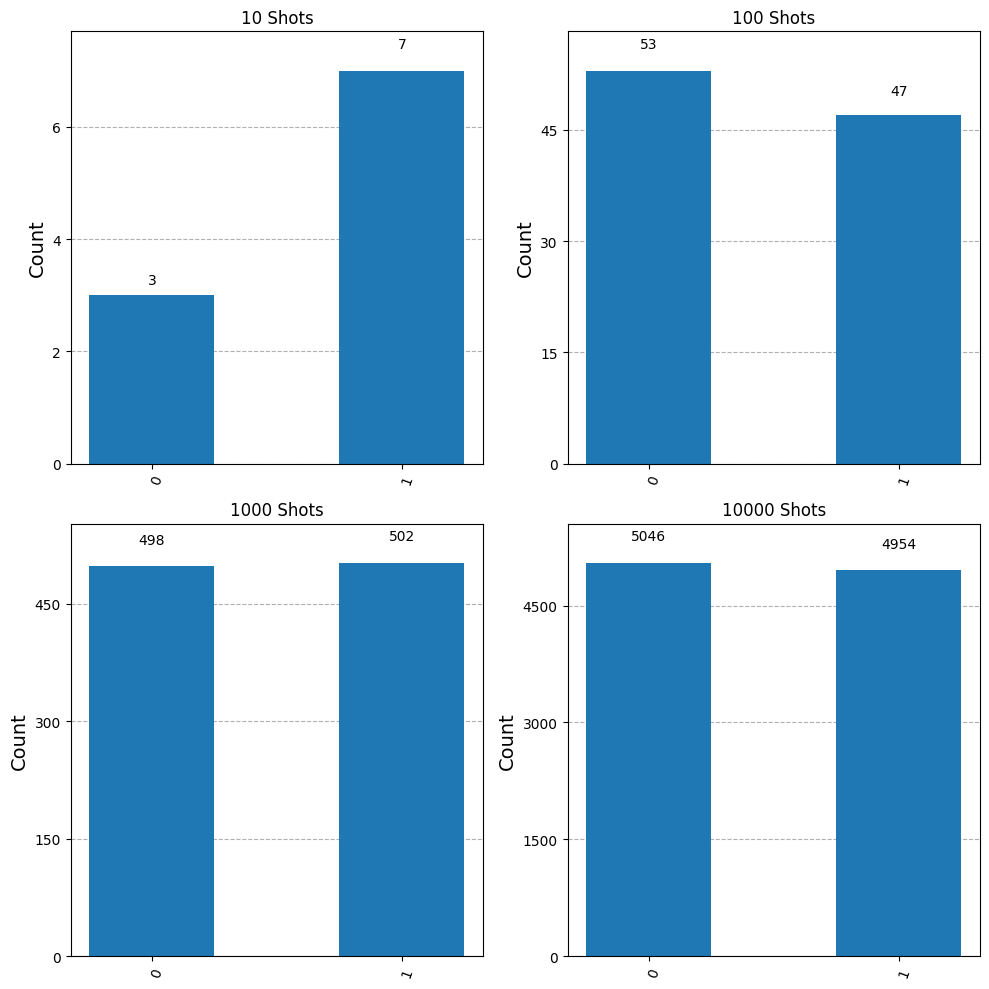

In [9]:
import numpy as np
import matplotlib.pyplot as plt 
from qiskit import * #qiskit
from qiskit.visualization import plot_histogram, plot_bloch_multivector, array_to_latex
#from qiskit.extensions import Initialize
from qiskit import QuantumCircuit, QuantumRegister, transpile, assemble#, execute, Aer, BasicAer
from qiskit_aer import Aer
from qiskit.quantum_info import random_statevector
from qiskit.quantum_info import partial_trace, entropy
import qiskit.quantum_info as qi

from IPython.display import HTML, display
#import ipywidgets as widgets

simulator = Aer.get_backend('qasm_simulator')

# Set figure size.
plt.figure(figsize=(10, 10))

# Setting up qubit state.
qc = QuantumCircuit(1)
qc.h(0)
qc.p(-3.14159/2, 0)
qc.measure_all()

# List of shots to execute.
simulator = Aer.get_backend('qasm_simulator')
shot_values = [10, 100, 1000, 10000]
results = {}

# Execute job.
for shots in shot_values:
    # Execute the circuit
    job = simulator.run(qc, shots=shots)
    
    # Get the result.
    result = job.result()
    counts = result.get_counts()
    results[shots] = counts

# Plot histogram.
for idx, shots in enumerate(shot_values):
    plt.subplot(2, 2, idx + 1)
    plot_histogram(results[shots], ax=plt.gca())
    plt.title(f'{shots} Shots')

# Display histogram of counts.
plt.tight_layout()
plt.show()

Exercise 2. What is an operator U that generates the following state?:

$$\begin{equation} \frac{\ket{0} - i\ket{1}}{\sqrt{2}} = U\ket{0} \end{equation}$$
Implement your operator (construct the circuit) and plot a histogram.

Hint: There are two ways: use a single unitary operator $u(\theta, \phi, \lambda)$ or combine two operators. For example, use an Hadamard operator $H$ and phase rotation $P(\theta) = \begin{pmatrix} 1 & 0 \\ 0 & e^{i\theta}\end{pmatrix}$. Also note the formula $e^{i\theta} = \cos\theta + i\sin\theta$.

In [13]:
import numpy as np
import matplotlib.pyplot as plt 
from qiskit import * #qiskit
from qiskit.visualization import plot_histogram, plot_bloch_multivector, array_to_latex
#from qiskit.extensions import Initialize
from qiskit import QuantumCircuit, QuantumRegister, transpile, assemble#, execute, Aer, BasicAer
from qiskit_aer import Aer
from qiskit.quantum_info import random_statevector
from qiskit.quantum_info import partial_trace, entropy
import qiskit.quantum_info as qi
from IPython.display import HTML, display

# Create a quantum circuit with 1 qubit
qc = QuantumCircuit(1)

# Apply Hadamard gate to create an equal superposition
qc.h(0)

# Apply Phase gate with theta = -pi/2 to add the required phase
qc.p(-np.pi / 2, 0)

# Draw the circuit
print("Quantum Circuit:")
print(qc.draw())

# Add measurements to the circuit
qc.measure_all()

# Simulate the circuit for measurement results using QasmSimulator
simulator = Aer.get_backend('qasm_simulator')
transpiled_circuit = transpile(qc, simulator)
result = simulator.run(transpiled_circuit, shots=1024).result()
counts = result.get_counts()

# Plot the histogram
print("Measurement Results:")
plot_histogram(counts)
plt.show()

# Verify the statevector without measurements
qc_no_measure = qc.remove_final_measurements(inplace=False)
statevector = Statevector.from_instruction(qc_no_measure)

print("Statevector:")
print(statevector)

Quantum Circuit:
   ┌───┐┌─────────┐
q: ┤ H ├┤ P(-π/2) ├
   └───┘└─────────┘
Measurement Results:
Statevector:
Statevector([7.07106781e-01+0.j        , 4.32978028e-17-0.70710678j],
            dims=(2,))



Exercise 3. Write down the following state as a four-dimensional vector:

$$\begin{equation} \ket{\phi^+} = \frac{\ket{00} + \ket{11}}{\sqrt{2}} \end{equation}$$

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit import *
from qiskit.visualization import plot_histogram, plot_bloch_multivector, array_to_latex
from qiskit import QuantumCircuit, QuantumRegister, transpile, assemble
from qiskit_aer import Aer
from qiskit.quantum_info import random_statevector
from qiskit.quantum_info import partial_trace, entropy
import qiskit.quantum_info as qi
from IPython.display import HTML, display

# Define the computational basis states |00> and |11> as vectors
ket_00 = np.array([1, 0, 0, 0])
ket_11 = np.array([0, 0, 0, 1])

# Define the state |phi+> = (|00> + |11>) / sqrt(2)
phi_plus = (ket_00 + ket_11) / np.sqrt(2)

# Print the resulting vector
print("The ∣Φ⁺⟩ state as a 4-D vector is:", phi_plus)

The ∣Φ⁺⟩ state as a 4-D vector is: [0.70710678 0.         0.         0.70710678]


Exercise 4. Draw the quantum circuits of the other Bell states: $$\ket{\Phi^-}, \ket{\Psi^+}, \ket{\Psi^-}$$.

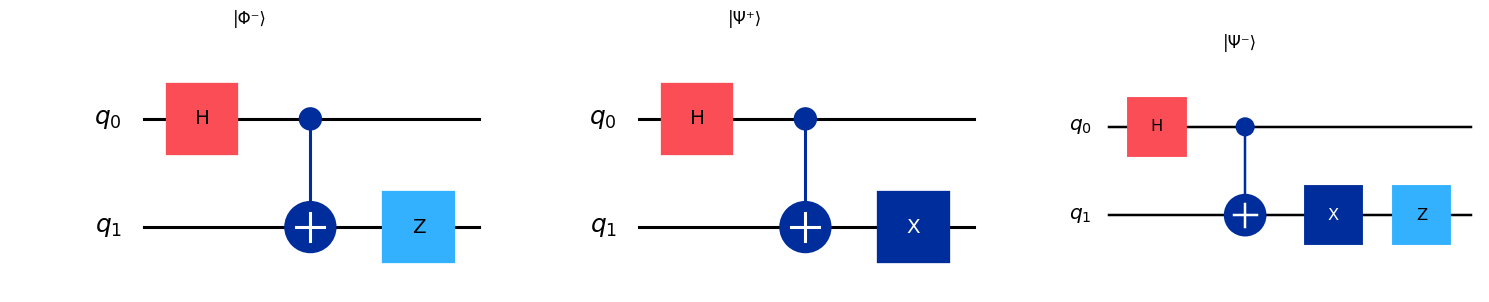

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit import *
from qiskit.visualization import plot_histogram, plot_bloch_multivector, array_to_latex
from qiskit import QuantumCircuit, QuantumRegister, transpile, assemble
from qiskit_aer import Aer
from qiskit.quantum_info import random_statevector
from qiskit.quantum_info import partial_trace, entropy
import qiskit.quantum_info as qi
from IPython.display import HTML, display
import matplotlib.pyplot as plt

# Generate circuit for |Φ⁻⟩
qc_phi_minus = QuantumCircuit(2)
qc_phi_minus.h(0)    # Apply Hadamard gate to qubit 0
qc_phi_minus.cx(0, 1)  # Apply CNOT with qubit 0 as control and qubit 1 as target
qc_phi_minus.z(1)     # Apply Z gate to qubit 1

# Generate circuit for |Ψ⁺⟩
qc_psi_plus = QuantumCircuit(2)
qc_psi_plus.h(0)     # Apply Hadamard gate to qubit 0
qc_psi_plus.cx(0, 1)  # Apply CNOT with qubit 0 as control and qubit 1 as target
qc_psi_plus.x(1)      # Apply X gate to qubit 1

# Generate circuit for |Ψ⁻⟩
qc_psi_minus = QuantumCircuit(2)
qc_psi_minus.h(0)    # Apply Hadamard gate to qubit 0
qc_psi_minus.cx(0, 1)  # Apply CNOT with qubit 0 as control and qubit 1 as target
qc_psi_minus.x(1)     # Apply X gate to qubit 1
qc_psi_minus.z(1)     # Apply Z gate to qubit 1

# Draw the circuits
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # 1 row, 3 columns

# Draw each circuit on a subplot
qc_phi_minus.draw('mpl', ax=axes[0])
axes[0].set_title("|Φ⁻⟩")

qc_psi_plus.draw('mpl', ax=axes[1])
axes[1].set_title("|Ψ⁺⟩")

qc_psi_minus.draw('mpl', ax=axes[2])
axes[2].set_title("|Ψ⁻⟩")

# Adjust layout and display
plt.tight_layout()
plt.show()